In [1]:
import MeCab


# 準備
with open("./neko.txt", "r", ) as f:
    text = f.read()
m = MeCab.Tagger("mecabrc")
parse_text = m.parse(text)
with open("./neko.txt.mecab", "w") as f:
    f.write(parse_text)

In [2]:
# 30. 形態素解析結果の読み込み
all_sent_list = []
sent_list = []
with open("./neko.txt.mecab", "r") as f:
    line = f.readline()
    while line:
        if line.decode("utf-8") == u"EOS\n":
            line = None
            continue
        morph = {}
        surface, features = line.split("\t")[0], line.split("\t")[1].split(",")
        morph["surface"] , morph["base"], morph["pos"], morph["pos1"] = surface, features[6], features[0], features[1]
        sent_list.append(morph)
        if morph["surface"].decode("utf-8") == u"。":
            all_sent_list.append(sent_list)
            sent_list = []
        line = f.readline()
print len(all_sent_list)

7486


In [3]:
# 31. 動詞 & 32.動詞の原形
verb_surface_list = []
verb_base_list = []
for sentence in all_sent_list:
    for morph in sentence:
        if morph["pos"].decode("utf-8") == u"動詞":
            verb_surface_list.append(morph["surface"])
            verb_base_list.append(morph["base"])
print len(verb_surface_list)

28908


In [4]:
# 33. サ変名詞
sahen_list = []
for sentence in all_sent_list:
    for morph in sentence:
        if morph["pos1"].decode("utf-8") == u"サ変接続":
            sahen_list.append(morph)
print len(sahen_list)

5216


In [5]:
# 34. 「AのB」
rensetsu_list = []
for sentence in all_sent_list:
    two_before_morph = None
    one_before_morph = None
    for morph in sentence:
        if two_before_morph is not None and one_before_morph is not None:
            if (two_before_morph["pos"].decode("utf-8") == u"名詞") and (one_before_morph["surface"].decode("utf-8") == u"の") and (morph["pos"].decode("utf-8") == u"名詞" ):
                rensetsu = [two_before_morph, one_before_morph, morph] 
                rensetsu_list.append(rensetsu)
        two_before_morph = one_before_morph
        one_before_morph = morph
print len(rensetsu_list)

6045


In [6]:
# 35. 名詞の連接
sequences = []
for sentence in all_sent_list:
    sequence = []
    for morph in sentence:
        if morph["pos"].decode("utf-8") == u"名詞":
            sequence.append(morph)
        else:
            if len(sequence) > 1:
                sequences.append(sequence)
            sequence = []
print len(sequences)

7374


In [7]:
# 36. 単語の出現頻度
word_count = {}
for sentence in all_sent_list:
    for morph in sentence:
        if not morph["base"] in word_count:
            word_count[morph["base"]] = 1
        else:
            word_count[morph["base"]] += 1
sorted_list = sorted(word_count.items(), key=lambda x:x[1], reverse=True)
print len(word_count)
for t in sorted_list[:30]:
    print t[0] + ":" + str(t[1])

11255
の:9194
。:7486
て:6853
、:6772
は:6422
に:6268
を:6071
だ:5978
と:5515
が:5339
た:4270
する:3669
「:3231
」:3225
ない:3054
も:2479
ある:2322
*
:2208
で:2090
から:2042
いる:1778
ん:1568
か:1530
云う:1408
事:1207
です:1164
ます:1146
なる:1121
へ:1034
う:987


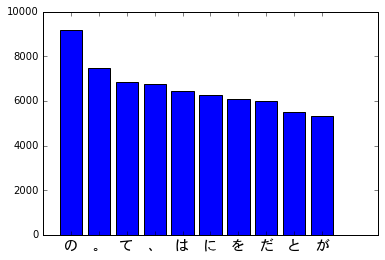

In [12]:
# 37. 頻度上位10語
# matplotlibで日本語を表示
# http://qiita.com/canard0328/items/a859bffc9c9e11368f37
# http://qiita.com/hagino3000/items/1b54acc01483ccd0ac72
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

fp = FontProperties(fname=u'/Library/Fonts/Osaka.ttf', size=14)

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = []
label = []
for t in sorted_list[:10]:
    label.append(t[0].decode("utf-8"))
    Y.append(t[1])
plt.bar(X, Y, align="center")
plt.xticks(X, label, fontproperties=fp)
plt.show()

11255


(array([    0.,  4721.,  1907.,   957.,   602.,   458.,   326.,   238.,
          208.,   161.,   122.,   121.,   120.,    84.,    93.,    73.,
           53.,    50.,    56.,    45.,    43.,    29.,    31.,    31.,
           34.,    22.,    17.,    25.,    19.,    21.,    23.,    12.,
           17.,    15.,    12.,    20.,    17.,     9.,    13.,    11.,
           13.,    14.,    10.,     7.,     9.,    11.,     9.,     8.,
            9.,    10.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.]),
 <a list of 50 Patch objects>)

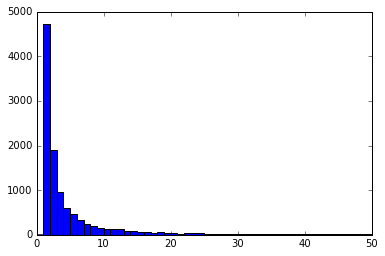

In [20]:
# 38. ヒストグラム
hist_list = []
for t in sorted_list:
    hist_list.append(t[1])

print len(hist_list)
plt.hist(hist_list, bins=50, range=(0, 50))

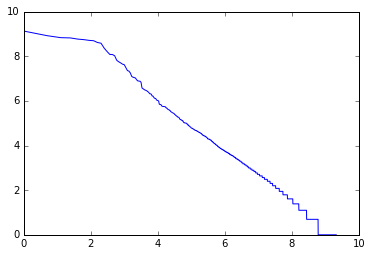

In [28]:
# 39. Zipfの法則
import math
X = []
Y = []
i = 1
for t in sorted_list:
    X.append(math.log(i))
    Y.append(math.log(t[1]))
    i +=1
plt.plot(X, Y)
plt.show()